# 简单数值微分

In [52]:
import numpy as np
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h) - f(x)) / h

为了缩小h值，但可能产生舍入误差——省略小数精细部分。python中

In [53]:
np.float32(1e-50)

np.float32(0.0)

可以看到会变成0.0，故应该使用10^-4.

而第二个错误是，“真导数”是函数在x上的斜率，而函数中计算的史(x+h)到x的斜率，h不能真的无限趋于0.

改进方法：使用中心差分。（上述方法为前向差分）

In [54]:
def numerical_diff(f, x):
    h = 1e-4    # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

## 数值微分的例子

In [55]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

绘制图像

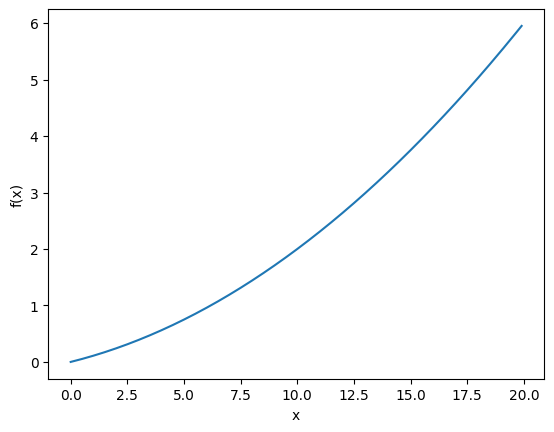

In [56]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

计算其在5和10点的导数

In [57]:
numerical_diff(function_1, 5)

0.1999999999990898

In [58]:
numerical_diff(function_1, 10)

0.2999999999986347

## 偏导数

对f(x0, x1) = x0^2 + x1^2

In [59]:
def function_2(x):
    return x[0]**2 + x[1]**2    # or return np.sum(x**2)

In [60]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

In [61]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [62]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

# 梯度 gradient

In [63]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # 生成和x形状相同的数组

    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x+h)的计算
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h)的计算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad


In [64]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [65]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [66]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

梯度指示的方向是各点处的函数值减小最多的方向

## 梯度法

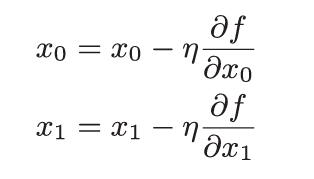

η 称为**学习率**，决定在一次学习中应该学习多少，以及在多大程度上更新参数。

以上步骤反复执行，逐渐减少函数值。

学习率需要事先确定数值，如0.001等。

In [67]:
def gradient_descent(f, init_x, lr=0.01,step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x

参数f是要进行最优化的函数，init_x是初始值，lr是学习率learning rate，step_num是梯度法的重复次数。

问题：请用梯度法求func2的最小值。

In [68]:
init_x = np.array([-3.0, -4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10, -8.14814391e-10])

初始值设置为(-3.0, -4.0),结果接近(0, 0)。

经测试，学习率设置过大过小都无法得到好的结果。人工设定的参数为**超参数**，区别于神经网络的参数（权重和偏置）。

## 神经网络的梯度
实现一个名为simpleNet的类用以实现梯度的计算


In [69]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)    # 用高斯分布进行初始化
    
    def predic(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predic(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss


In [70]:
net = simpleNet()
print(net.W)

[[ 1.01678349  0.25585656 -2.04626248]
 [-0.88743438 -1.14384567  1.41931674]]


In [71]:
x = np.array([0.6, 0.9])
p = net.predic(x)
print(p)

[-0.18862084 -0.87594716  0.04962757]


In [72]:
np.argmax(p) # 索引的最大值

np.int64(2)

In [73]:
t = np.array([0,0,1]) # 正确解标签
net.loss(x,t)

np.float64(0.7812999981518971)

then求梯度

W是个伪参数

In [74]:
def f(W):
    return net.loss(x, t)

In [75]:
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.2164546   0.10885911 -0.32531371]
 [ 0.32468189  0.16328867 -0.48797056]]


py中定义简单的函数，可以用lambda表示法

使用了 Python 的 lambda 匿名函数，它的作用是定义一个简单的函数，而不用正式使用 def 来定义。lambda 是 Python 的关键字，用于创建 匿名函数（即没有名字的函数），通常用于简化代码，特别是在需要短小函数的地方（比如作为参数传递给高阶函数 map、filter 或 sorted）。

```python
lambda 参数: 返回值
```

In [76]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)